El siguiente dataset presenta una serie de 4 clusterizaciones de los países del mundo en base a variables ocupacionales. Las variables son las siguientes:
* iso3c: Código normalizado para la identificación de países a 3 letras
* iso2c: Código normalizado para la identificación de países a 2 letras
* country: Etiqueta de país
* prop_agro: % total el empleo en agricultura: consistente en las actividades de agricultura, silvicultura, caza y pesca  
* prop_ind: % total de empleo en industria:  en actividades de minas y canteras, manufacturas, construcción y energía, gas y agua.
* prop_serv: % total de empleo el servicios comprende comercio al por mayor y menor y restaurantes y hoteles, transporte, almacenamiento y comunicaciones, finanzas, seguros, servicios inmobiliarios y a las empresas y servicios personales, sociales y comunales.
* prop_fam: % total de trabajadores familiares
* prop_emp: % total de empleadores  
* prop_tcp`: % total de trabajadores por cuenta propia
* prop_asal: % total de trabajadores asalariados
* prop_pob_rel_sal: suma de prop_emp + prop_asal
* prop_pob_rel_no_sal: suma de prop_fam + prop_tcp
* clst_3, clst_5, clst_8, clst_9: Identificadores de diferentes modelos de clustering

A partir del dataset en cuestión, deberán responder dos preguntas:





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [2]:
df=pd.read_csv("/content/wb_bank_data_2019_clsts.csv")

#Analicemos el df

In [3]:
df.head()

,iso3c,iso2c,country,prop_agro,prop_ind,prop_serv,prop_familiar,prop_emp,prop_asal,prop_tcp,prop_pob_rel_sal,prop_pob_rel_no_sal,clust_3,clust_5,clust_8,clust_9
0,AFG,AF,Afghanistan,42.839001,18.162001,38.999001,23.396,2.602,17.672001,56.330003,20.274001,79.726003,C2,C1,C1,C9
1,ALB,AL,Albania,36.691002,20.004999,43.304001,27.365,2.517,44.631001,25.487000,47.148000,52.852000,C3,C1,C2,C1
2,DZA,DZ,Algeria,9.856000,30.733999,59.410000,1.863,4.617,68.389000,25.131000,73.006000,26.994000,C1,C2,C3,C5
3,AGO,AO,Angola,50.380001,8.122000,41.498001,8.829,4.261,29.743000,57.167003,34.004000,65.996004,C2,C1,C2,C8
4,ARG,AR,Argentina,0.092000,21.410999,78.497002,0.543,3.907,74.287003,21.262999,78.194003,21.805999,C1,C3,C4,C5


In [4]:
df.columns

Index(['iso3c', 'iso2c', 'country', 'prop_agro', 'prop_ind', 'prop_serv',
       'prop_familiar', 'prop_emp', 'prop_asal', 'prop_tcp',
       'prop_pob_rel_sal', 'prop_pob_rel_no_sal', 'clust_3', 'clust_5',
       'clust_8', 'clust_9'],
      dtype='object')

In [5]:
len(df)

187

In [6]:
df[df['country']=='Brazil']

,iso3c,iso2c,country,prop_agro,prop_ind,prop_serv,prop_familiar,prop_emp,prop_asal,prop_tcp,prop_pob_rel_sal,prop_pob_rel_no_sal,clust_3,clust_5,clust_8,clust_9
21,BRA,BR,Brazil,9.221,19.783001,70.996002,2.296,4.803,67.289001,25.611999,72.092001,27.907999,C1,C2,C6,C7


In [7]:
df[df['clust_8']=='C8']['country']

,country
25,Burundi
30,Central African Republic
31,Chad
122,Niger
150,Somalia


In [8]:
df[df['clust_5']=='C1']['country']

,country
0,Afghanistan
1,Albania
3,Angola
8,Azerbaijan
11,Bangladesh
16,Benin
18,Bolivia
24,Burkina Faso
27,Cambodia
28,Cameroon


Obs: El dataset tiene 3 'subcategorias' que entre ellas suman el 100%

In [62]:
df[['prop_agro','prop_ind','prop_serv',]].sum(axis=1).head()

,0
0,100.000002
1,100.000002
2,99.999999
3,100.000002
4,100.000001


In [52]:
df[['prop_familiar','prop_emp','prop_asal','prop_tcp']].sum(axis=1).head()

,0
0,100.000004
1,100.000000
2,100.000000
3,100.000004
4,100.000002


In [53]:
df[['prop_pob_rel_sal','prop_pob_rel_no_sal']].sum(axis=1).head()

,0
0,100.000004
1,100.000000
2,100.000000
3,100.000004
4,100.000002


#a) ¿Cuál es la clusterización más efectiva para agrupar los países?


In [12]:
# Definir los clusters a usar
cluster_columns = ['clust_3', 'clust_5', 'clust_8', 'clust_9']

Criterio de agrupación:

Hicimos un group by de cada columna clust_n y tomamos promedio de cada categoría.

Los colores fueron elegidos según nos pareció que mejor representaban  los sectores/tipos de empleo.

##Barplots de ["prop_agro", "prop_ind", "prop_serv"]

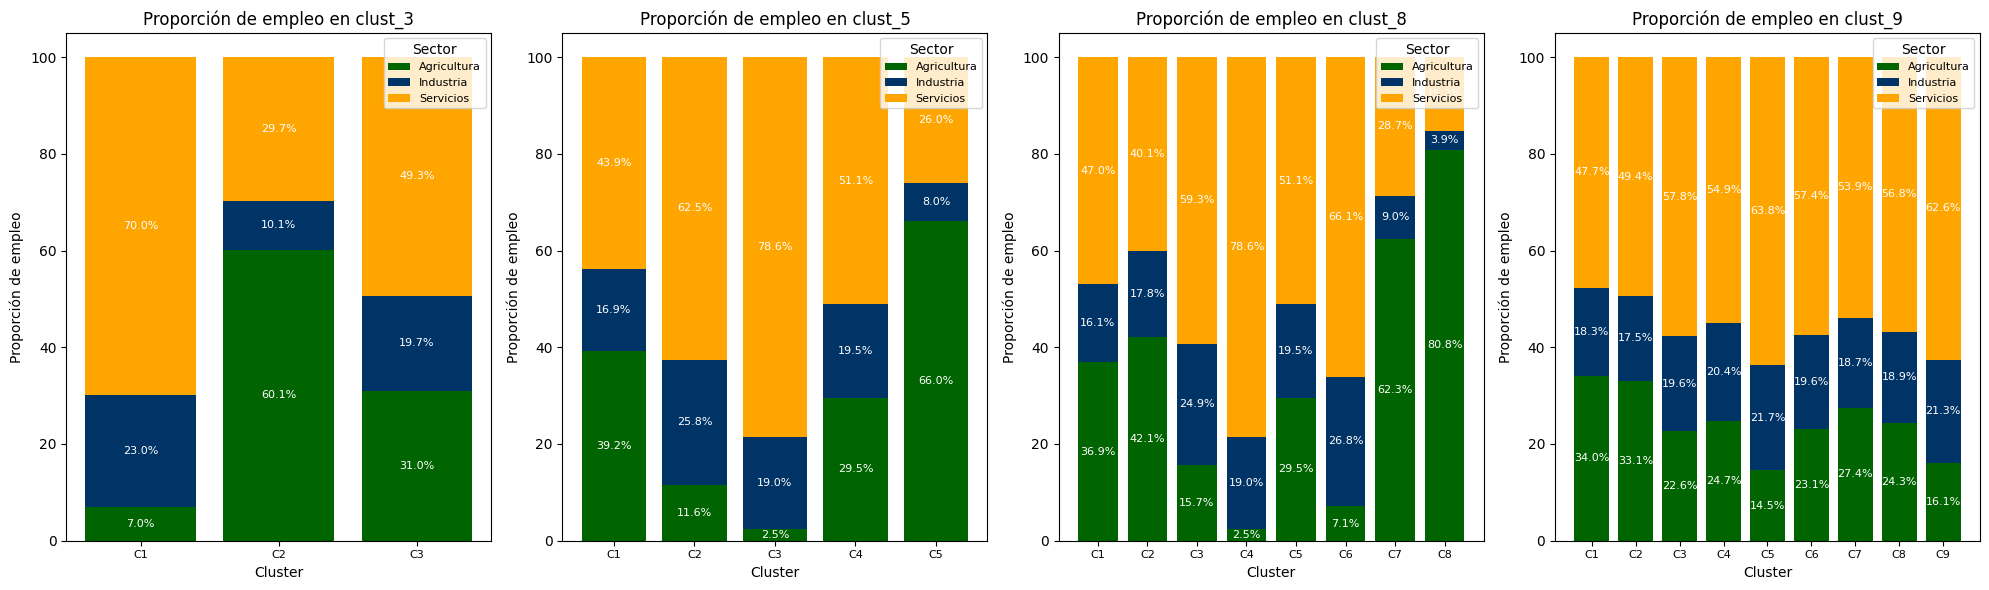

In [40]:
colors = ["#006400", "#003366", "#FFA500"]

# Crear la figura con 4 subplots (1 fila y 4 columnas)
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Iterar sobre cada cluster y su respectivo eje
for i, cluster_column in enumerate(cluster_columns):
    # Agrupar los datos por el cluster correspondiente y calcular la media
    grouped_data = df.groupby(cluster_column)[["prop_agro", "prop_ind", "prop_serv"]].mean()

    # Asignar las variables para las proporciones
    prop_agro = grouped_data["prop_agro"]
    prop_ind = grouped_data["prop_ind"]
    prop_serv = grouped_data["prop_serv"]

    # Crear el gráfico apilado
    bars_agro = axes[i].bar(grouped_data.index, prop_agro, color=colors[0], label="Agricultura")
    bars_ind = axes[i].bar(grouped_data.index, prop_ind, bottom=prop_agro, color=colors[1], label="Industria")
    bars_serv = axes[i].bar(grouped_data.index, prop_serv, bottom=prop_agro + prop_ind, color=colors[2], label="Servicios")

    # Agregar porcentajes a cada barra
    for x, agro, ind, serv in zip(grouped_data.index, prop_agro, prop_ind, prop_serv):
        # Dividir por 100 antes de usar el formato de porcentaje
        axes[i].text(x, agro / 2, f"{agro / 100:.1%}", ha="center", va="center", fontsize=8, color="white")
        axes[i].text(x, agro + ind / 2, f"{ind / 100:.1%}", ha="center", va="center", fontsize=8, color="white")
        axes[i].text(x, agro + ind + serv / 2, f"{serv / 100:.1%}", ha="center", va="center", fontsize=8, color="white")

    # Personalizar el título y etiquetas para cada subplot
    axes[i].set_title(f"Proporción de empleo en {cluster_column}", fontsize=12)
    axes[i].set_xlabel("Cluster", fontsize=10)
    axes[i].set_ylabel("Proporción de empleo", fontsize=10)
    axes[i].legend(title="Sector", fontsize=8, title_fontsize=10)
    axes[i].set_xticks(grouped_data.index)
    axes[i].set_xticklabels(grouped_data.index, fontsize=8)

# Ajustar el layout para que no se sobrepongan los elementos
plt.tight_layout()
plt.show()

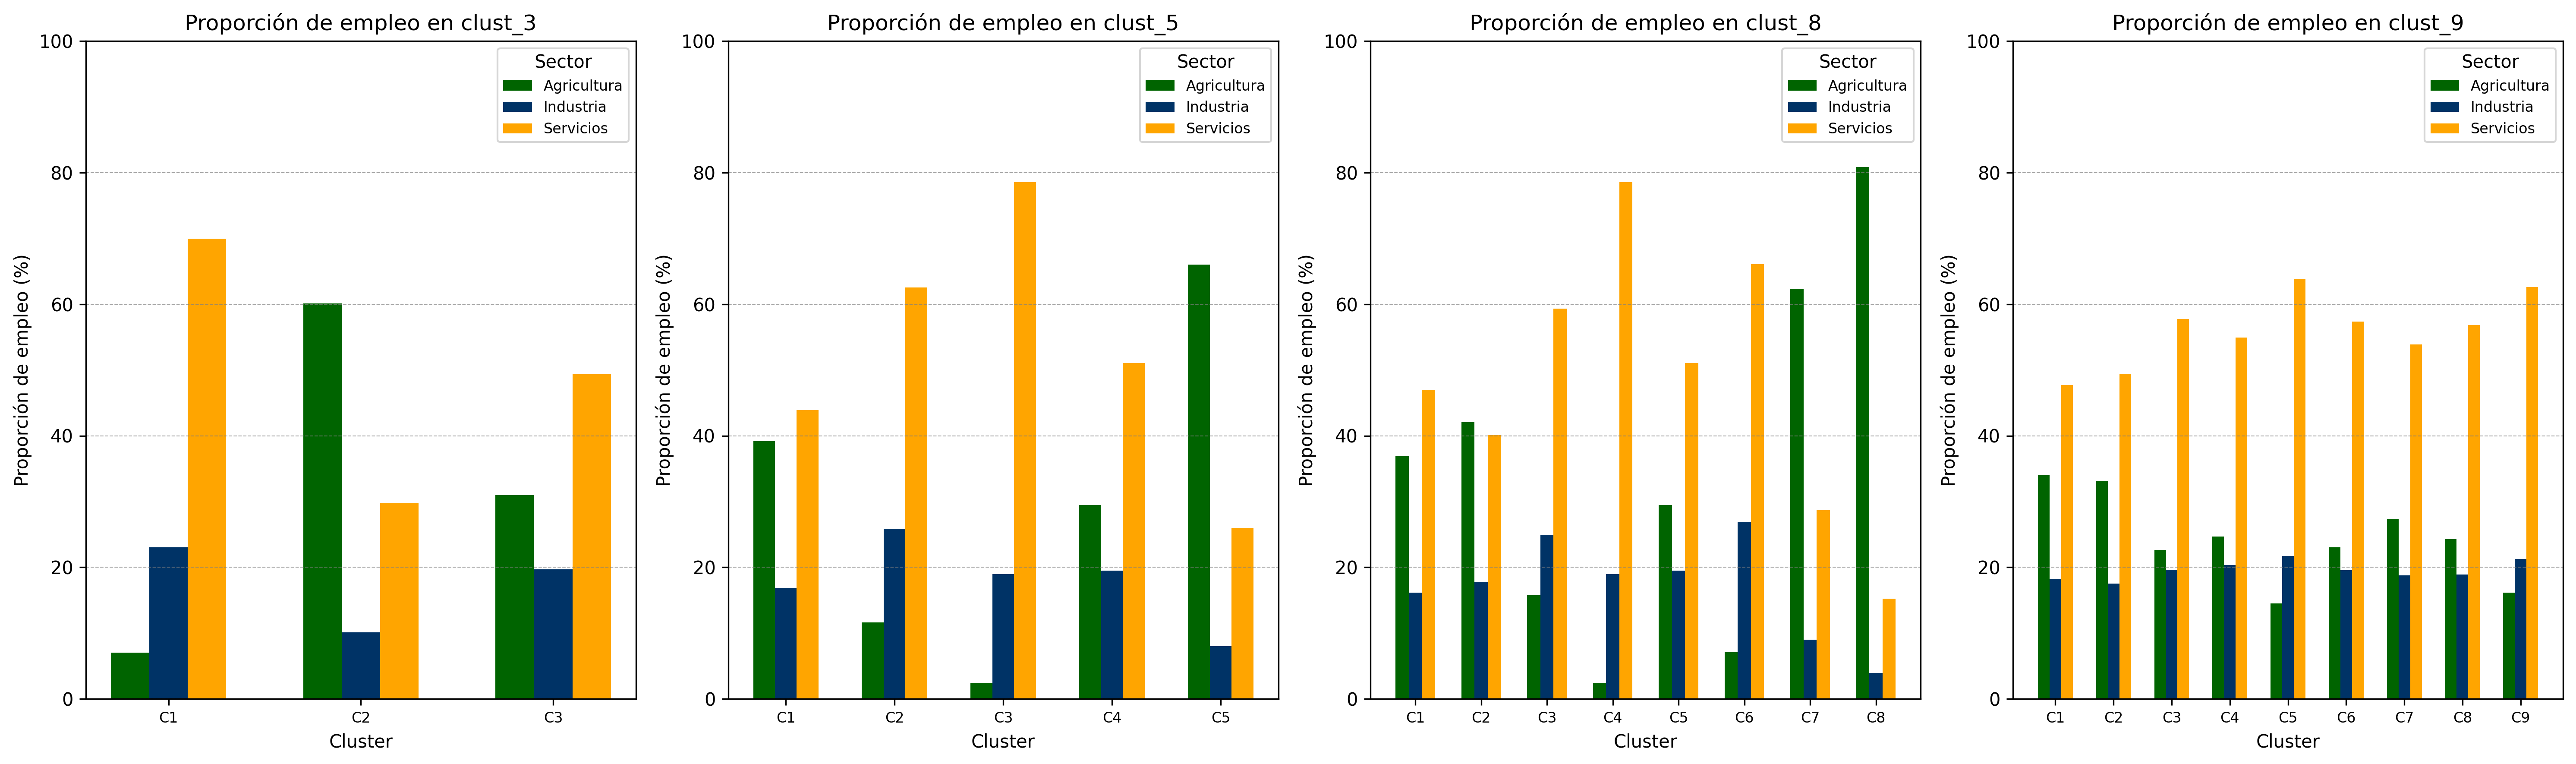

In [99]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6),dpi=300)

# Ancho de las barras
bar_width = 0.2
# Definir los colores para las barras
colors = ["#006400", "#003366", "#FFA500"]

# Iterar sobre cada cluster y su respectivo eje
for i, cluster_column in enumerate(['clust_3', 'clust_5', 'clust_8', 'clust_9']):
    # Agrupar los datos por el cluster específico y calcular los promedios de los sectores
    grouped_data = df.groupby(cluster_column)[["prop_agro", "prop_ind", "prop_serv"]].mean()

    # Obtener las posiciones de las barras (con un pequeño ajuste por cada barra)
    x_positions = np.arange(len(grouped_data))

    # Crear las barras para los tres sectores: agro, industria, servicios
    axes[i].bar(x_positions - bar_width, grouped_data["prop_agro"], width=bar_width, color=colors[0], label="Agricultura")
    axes[i].bar(x_positions, grouped_data["prop_ind"], width=bar_width, color=colors[1], label="Industria")
    axes[i].bar(x_positions + bar_width, grouped_data["prop_serv"], width=bar_width, color=colors[2], label="Servicios")
    axes[i].grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Personalizar el título y etiquetas para cada subplot
    axes[i].set_title(f"Proporción de empleo en {cluster_column}", fontsize=12)
    axes[i].set_xlabel("Cluster", fontsize=10)
    axes[i].set_ylabel("Proporción de empleo (%)", fontsize=10)
    axes[i].legend(title="Sector", fontsize=8, title_fontsize=10)
    axes[i].set_ylim(0, 100)
    # Asignar etiquetas de los clusters (x-ticks)
    axes[i].set_xticks(x_positions)
    axes[i].set_xticklabels(grouped_data.index, fontsize=8)  # Usamos los índices de los clusters como etiquetas

# Ajustar el layout para que no se sobrepongan los elementos
plt.tight_layout()
plt.show()

El primer barplot sirve para ver la relación entre los distintos sectores dentro de un mismo cluster.

El segundo barplot sirve para comparar los sectores entre los clusters.

##Barplots de ["prop_familiar", "prop_emp", "prop_asal", "prop_tcp"]

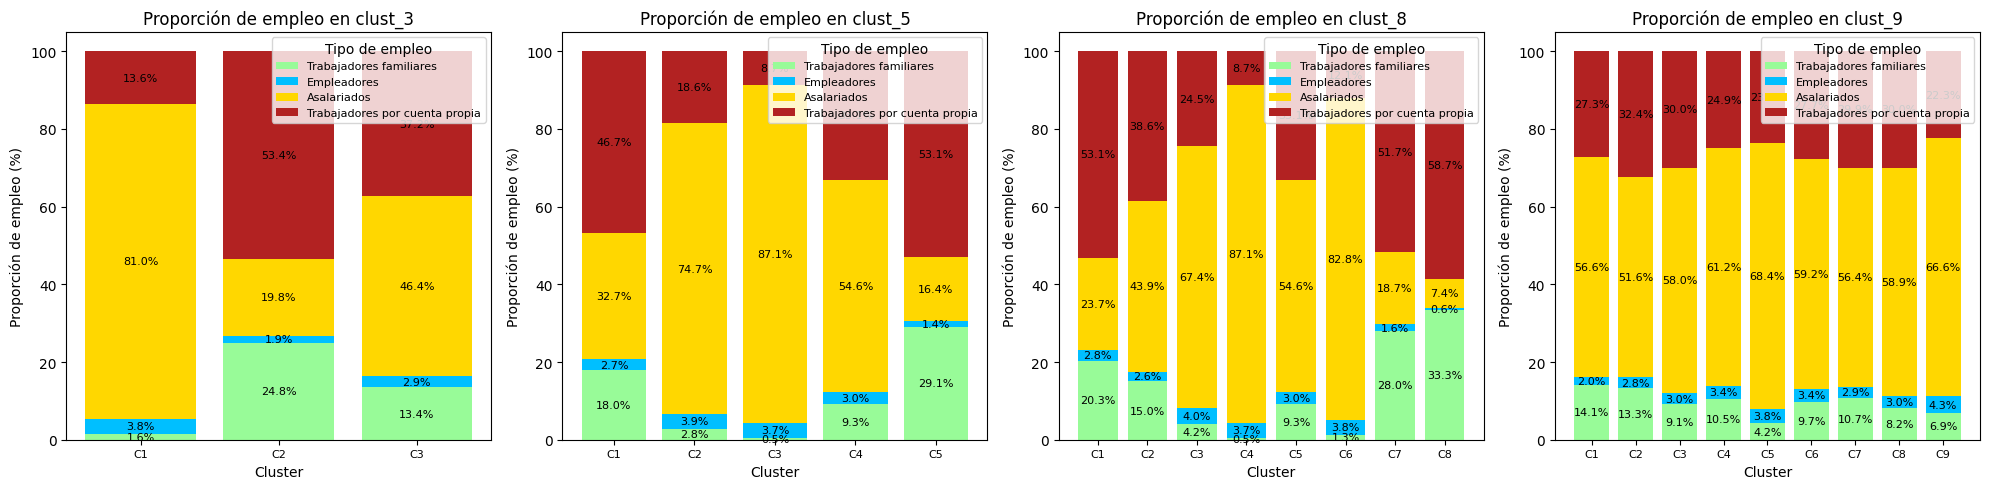

In [45]:
colors = ['#98FB98', '#00BFFF', '#FFD700', '#B22222']

# Crear la figura con 4 subplots (1 fila y 4 columnas)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Iterar sobre cada cluster y su respectivo eje
for i, cluster_column in enumerate(cluster_columns):
    # Agrupar los datos por el cluster correspondiente y calcular la media
    grouped_data = df.groupby(cluster_column)[["prop_familiar", "prop_emp", "prop_asal", "prop_tcp"]].mean()

    # Asignar las variables para las proporciones
    prop_familiar = grouped_data["prop_familiar"]
    prop_emp = grouped_data["prop_emp"]
    prop_asal = grouped_data["prop_asal"]
    prop_tcp = grouped_data["prop_tcp"]

    # Crear el gráfico apilado
    bars_familiar = axes[i].bar(grouped_data.index, prop_familiar, color=colors[0], label="Trabajadores familiares")
    bars_emp = axes[i].bar(grouped_data.index, prop_emp, bottom=prop_familiar, color=colors[1], label="Empleadores")
    bars_asal = axes[i].bar(grouped_data.index, prop_asal, bottom=prop_familiar + prop_emp, color=colors[2], label="Asalariados")
    bars_tcp = axes[i].bar(grouped_data.index, prop_tcp, bottom=prop_familiar + prop_emp + prop_asal, color=colors[3], label="Trabajadores por cuenta propia")

    # Agregar porcentajes a cada barra
    for x, fam, emp, asal, tcp in zip(grouped_data.index, prop_familiar, prop_emp, prop_asal, prop_tcp):
        axes[i].text(x, fam / 2, f"{fam / 100:.1%}", ha="center", va="center", fontsize=8, color="black")
        axes[i].text(x, fam + emp / 2, f"{emp / 100:.1%}", ha="center", va="center", fontsize=8, color="black")
        axes[i].text(x, fam + emp + asal / 2, f"{asal / 100:.1%}", ha="center", va="center", fontsize=8, color="black")
        axes[i].text(x, fam + emp + asal + tcp / 2, f"{tcp / 100:.1%}", ha="center", va="center", fontsize=8, color="black")

    # Personalizar el título y etiquetas para cada subplot
    axes[i].set_title(f"Proporción de empleo en {cluster_column}", fontsize=12)
    axes[i].set_xlabel("Cluster", fontsize=10)
    axes[i].set_ylabel("Proporción de empleo (%)", fontsize=10)
    axes[i].legend(title="Tipo de empleo", fontsize=8, title_fontsize=10, loc=1)
    axes[i].set_xticks(grouped_data.index)
    axes[i].set_xticklabels(grouped_data.index, fontsize=8)

# Ajustar el layout para que no se sobrepongan los elementos
plt.tight_layout()
plt.show()

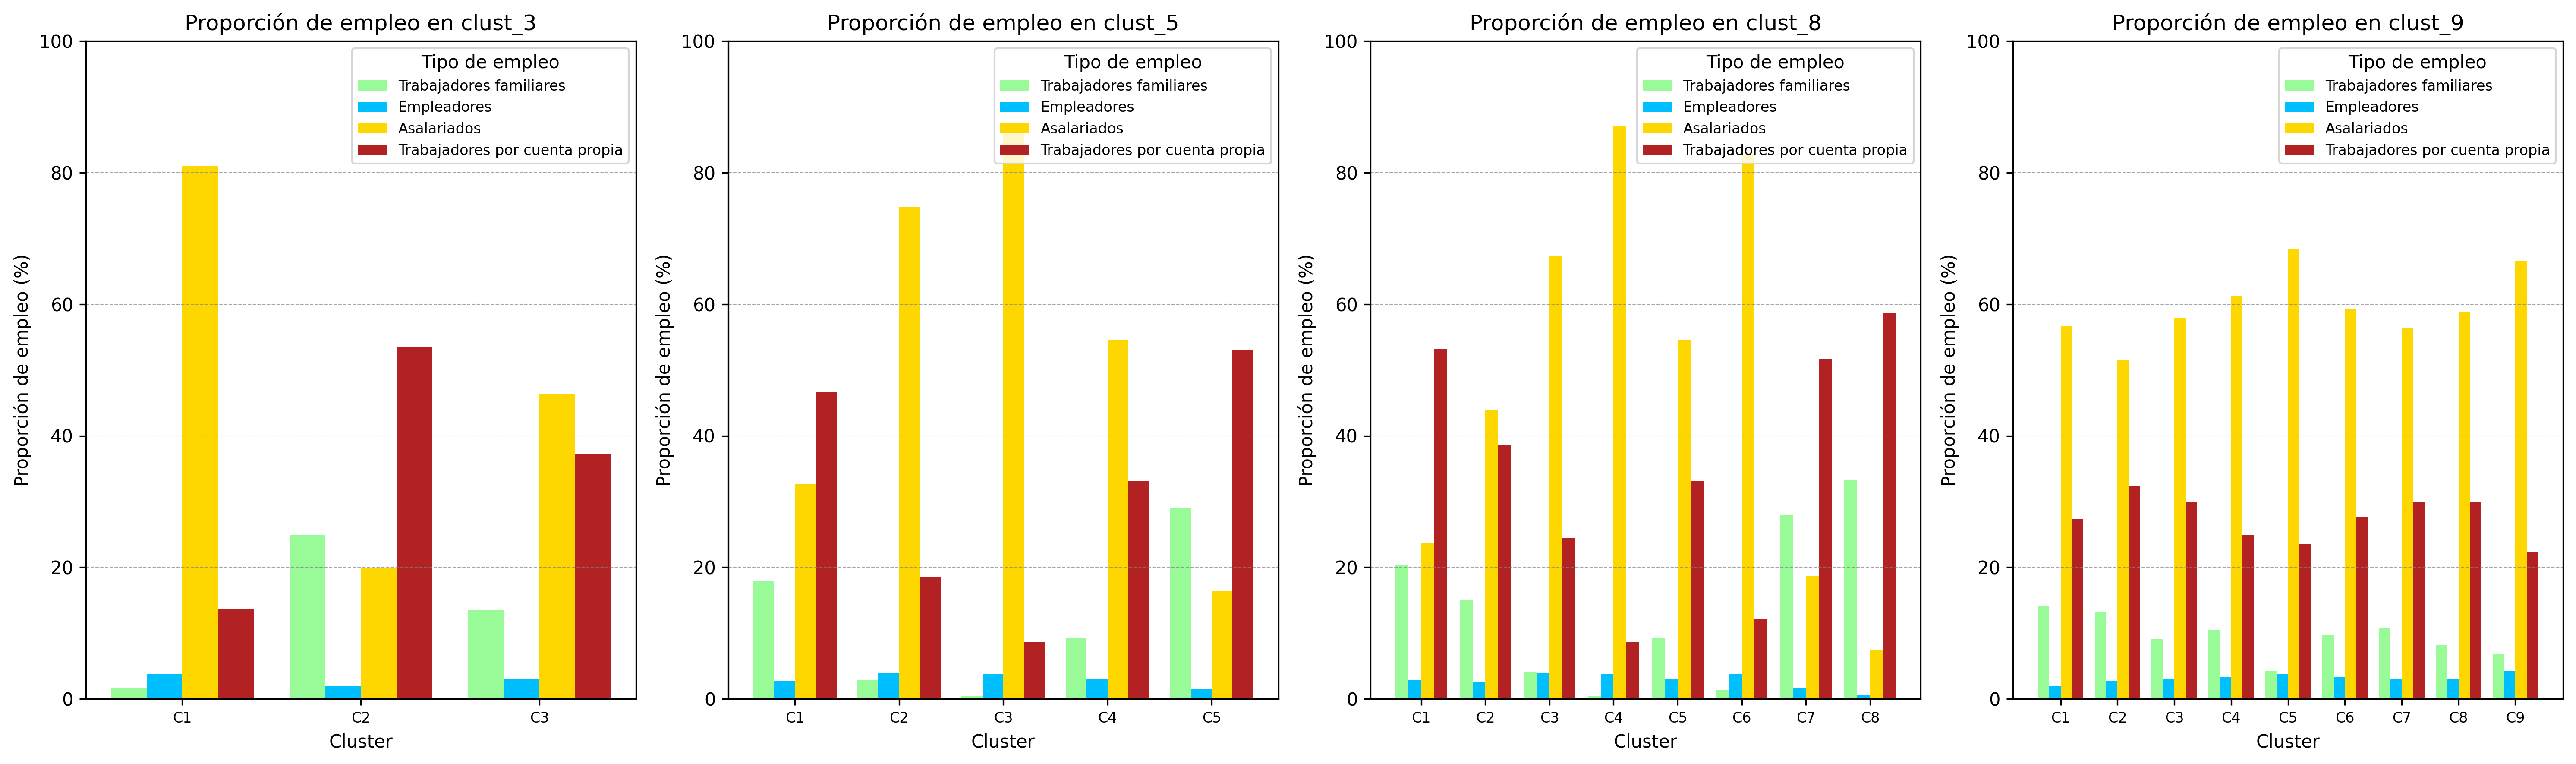

In [98]:
# Crear la figura con 4 subplots (1 fila y 4 columnas)
fig, axes = plt.subplots(1, 4, figsize=(20, 6),dpi=300)

# Ancho de las barras
bar_width = 0.2
# Definir los colores para las barras
colors = ['#98FB98' ,'#00BFFF','#FFD700','#B22222']

# Iterar sobre cada cluster y su respectivo eje
for i, cluster_column in enumerate(['clust_3', 'clust_5', 'clust_8', 'clust_9']):
    # Agrupar los datos por el cluster específico y calcular los promedios de las nuevas columnas
    grouped_data = df.groupby(cluster_column)[["prop_familiar", "prop_emp", "prop_asal", "prop_tcp"]].mean()

    # Obtener las posiciones de las barras (con un pequeño ajuste por cada barra)
    x_positions = np.arange(len(grouped_data))

    # Crear las barras para los 4 sectores: prop_familiar, prop_emp, prop_asal, prop_tcp
    axes[i].bar(x_positions - 1.5*bar_width, grouped_data["prop_familiar"], width=bar_width, color=colors[0], label="Trabajadores familiares")
    axes[i].bar(x_positions - 0.5*bar_width, grouped_data["prop_emp"], width=bar_width, color=colors[1], label="Empleadores")
    axes[i].bar(x_positions + 0.5*bar_width, grouped_data["prop_asal"], width=bar_width, color=colors[2], label="Asalariados")
    axes[i].bar(x_positions + 1.5*bar_width, grouped_data["prop_tcp"], width=bar_width, color=colors[3], label="Trabajadores por cuenta propia")
    axes[i].grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    # Personalizar el título y etiquetas para cada subplot
    axes[i].set_title(f"Proporción de empleo en {cluster_column}", fontsize=12)
    axes[i].set_xlabel("Cluster", fontsize=10)
    axes[i].set_ylabel("Proporción de empleo (%)", fontsize=10)
    axes[i].legend(title="Tipo de empleo", fontsize=8, title_fontsize=10)
    axes[i].set_ylim(0, 100)
    # Asignar etiquetas de los clusters (x-ticks)
    axes[i].set_xticks(x_positions)
    axes[i].set_xticklabels(grouped_data.index, fontsize=8)  # Usamos los índices de los clusters como etiquetas

# Ajustar el layout para que no se sobrepongan los elementos
plt.tight_layout()
plt.show()

##Scatterplot "prop_asal" vs "prop_emp"

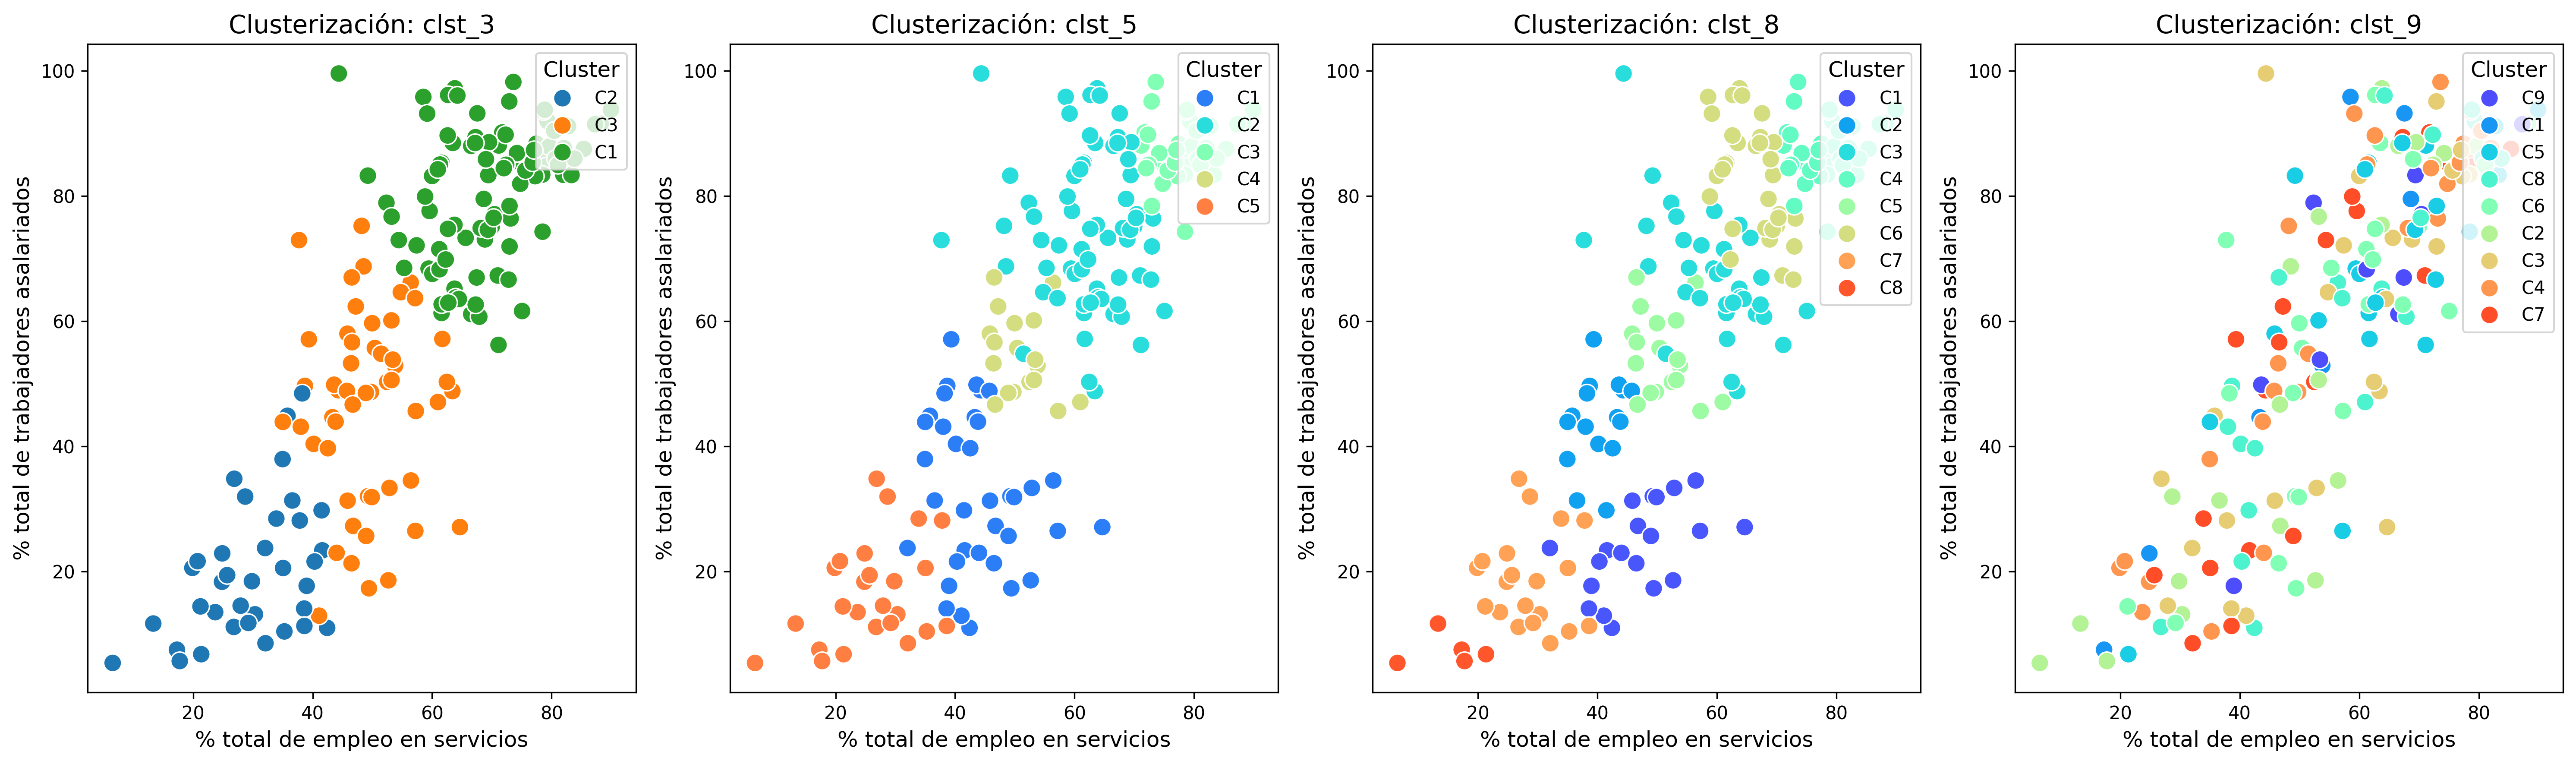

In [59]:
fig, ax = plt.subplots(1,4,figsize=(20, 6),dpi=300)  # Tamaño del gráfico
xlab="% total de empleo en servicios"
ylab="% total de trabajadores asalariados"
X="prop_serv"
Y="prop_asal"

# Scatterplot
sns.scatterplot(
    data=df,
    x=X,
    y=Y,
    hue='clust_3',  # Variable de agrupamiento
    palette="tab10",  # Paleta de colores para los clusters
    s=100,  # Tamaño de los puntos
    ax=ax[0]
)

# Configuración de título y etiquetas
ax[0].set_title("Clusterización: clst_3", fontsize=14)
ax[0].set_xlabel(xlab, fontsize=12)
ax[0].set_ylabel(ylab, fontsize=12)
ax[0].legend(title="Cluster", fontsize=10, title_fontsize=12, loc="upper right")  # Leyenda personalizada

sns.scatterplot(
    data=df,
    x=X,
    y=Y,
    hue='clust_5',  # Variable de agrupamiento
    palette="rainbow",
    s=100,
    ax=ax[1]
)
ax[1].set_title("Clusterización: clst_5", fontsize=14)
ax[1].set_xlabel(xlab, fontsize=12)
ax[1].set_ylabel(ylab, fontsize=12)
ax[1].legend(title="Cluster", fontsize=10, title_fontsize=12, loc="upper right")

sns.scatterplot(
    data=df,
    x=X,
    y=Y,
    hue='clust_8',  # Variable de agrupamiento
    palette="rainbow",
    s=100,
    ax=ax[2]
)
ax[2].set_title("Clusterización: clst_8", fontsize=14)
ax[2].set_xlabel(xlab, fontsize=12)
ax[2].set_ylabel(ylab, fontsize=12)
ax[2].legend(title="Cluster", fontsize=10, title_fontsize=12, loc="upper right")

sns.scatterplot(
    data=df,
    x=X,
    y=Y,
    hue='clust_9',
    s=100,
    palette="rainbow",
    ax=ax[3]
)
ax[3].set_title("Clusterización: clst_9", fontsize=14)
ax[3].set_xlabel(xlab, fontsize=12)
ax[3].set_ylabel(ylab, fontsize=12)
ax[3].legend(title="Cluster", fontsize=10, title_fontsize=12, loc="upper right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

##Scatterplot se prop_agro vs prop_familiar

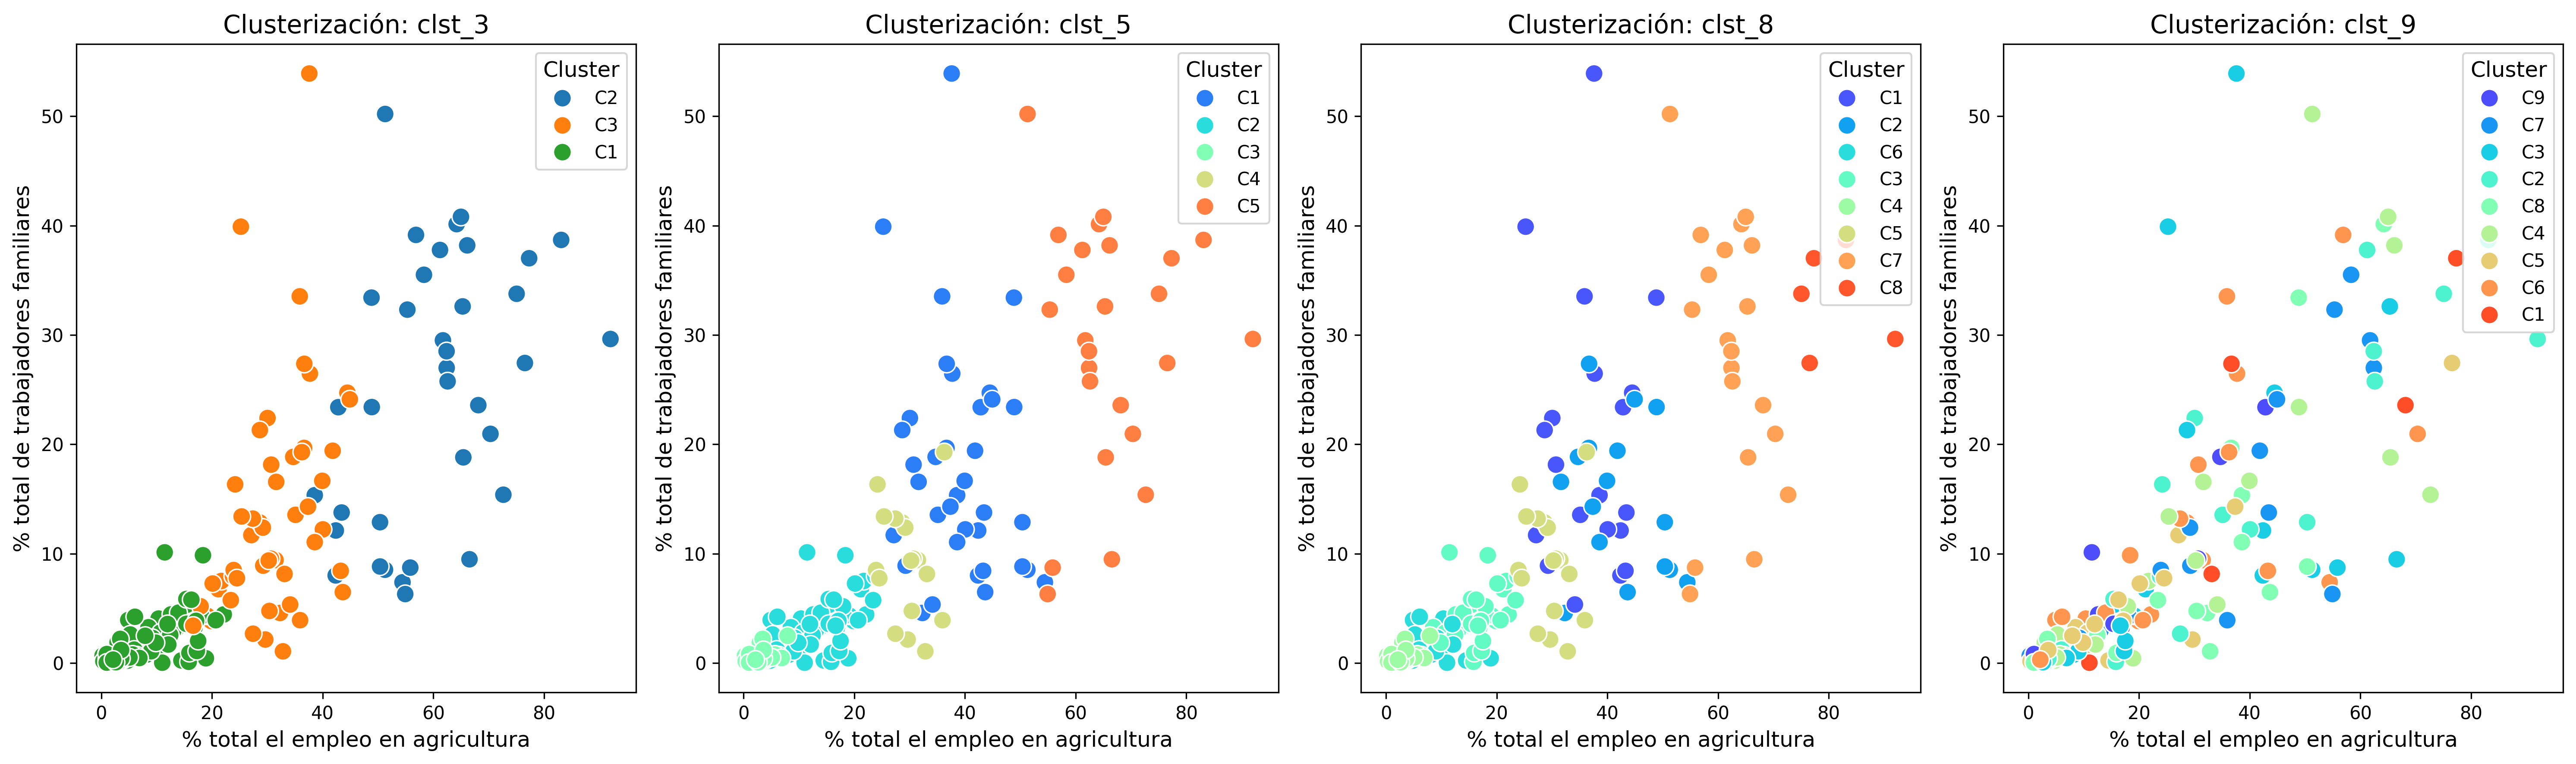

In [82]:
fig, ax = plt.subplots(1,4,figsize=(20, 6),dpi=300)  # Tamaño del gráfico
xlab="% total el empleo en agricultura"
ylab="% total de trabajadores familiares"
X="prop_agro"
Y="prop_familiar"

# Scatterplot
sns.scatterplot(
    data=df,
    x=X,
    y=Y,
    hue='clust_3',  # Variable de agrupamiento
    palette="tab10",  # Paleta de colores para los clusters
    s=100,  # Tamaño de los puntos
    ax=ax[0]
)

# Configuración de título y etiquetas
ax[0].set_title("Clusterización: clst_3", fontsize=14)
ax[0].set_xlabel(xlab, fontsize=12)
ax[0].set_ylabel(ylab, fontsize=12)
ax[0].legend(title="Cluster", fontsize=10, title_fontsize=12, loc="upper right")  # Leyenda personalizada

sns.scatterplot(
    data=df,
    x=X,
    y=Y,
    hue='clust_5',  # Variable de agrupamiento
    palette="rainbow",
    s=100,
    ax=ax[1]
)
ax[1].set_title("Clusterización: clst_5", fontsize=14)
ax[1].set_xlabel(xlab, fontsize=12)
ax[1].set_ylabel(ylab, fontsize=12)
ax[1].legend(title="Cluster", fontsize=10, title_fontsize=12, loc="upper right")

sns.scatterplot(
    data=df,
    x=X,
    y=Y,
    hue='clust_8',  # Variable de agrupamiento
    palette="rainbow",
    s=100,
    ax=ax[2]
)
ax[2].set_title("Clusterización: clst_8", fontsize=14)
ax[2].set_xlabel(xlab, fontsize=12)
ax[2].set_ylabel(ylab, fontsize=12)
ax[2].legend(title="Cluster", fontsize=10, title_fontsize=12, loc="upper right")

sns.scatterplot(
    data=df,
    x=X,
    y=Y,
    hue='clust_9',
    s=100,
    palette="rainbow",
    ax=ax[3]
)
ax[3].set_title("Clusterización: clst_9", fontsize=14)
ax[3].set_xlabel(xlab, fontsize=12)
ax[3].set_ylabel(ylab, fontsize=12)
ax[3].legend(title="Cluster", fontsize=10, title_fontsize=12, loc="upper right")

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Si observamos alguna de las clusterizaciones que identificamos como más precisa, léase la de cinco o la de ocho, podemos identificar algunas métricas parecidas, las cuales decidimos reflejar en los scatter-plots.

En primer lugar, podemos observar que la proporción de sector agrícola con la de empleo de subsistencia (prop_familiar) están íntimamente relacionadas. A su vez, notamos lo mismo si comparamos sector servicios con la proporción de asalariados. Además, los países que tienen mucha parte industrial y servicios, suelen aparecer en los mismos clusters, además de tener muchos asalariados y empleadores.

#b) A partir de la clusterización identificada en la pregunta anterior, ¿cómo se compone cada cluster? Es decir, deberán caracterizar cada uno de los clusters.

Comparación con IDH

In [19]:
hdi = pd.read_csv("/content/hdi.csv")

In [20]:
hdi.columns

Index(['iso3c', 'country', 'year', 'value'], dtype='object')

In [21]:
merge=pd.merge(df, hdi, how='inner', on='iso3c')

In [22]:
set(hdi['year'].dropna().unique())

{2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022}

In [23]:
anio=merge[merge['year']==2019]

In [24]:
anio[[ 'country_x','value', 'clust_3', 'clust_5',
       'clust_8', 'clust_9']].sort_values(by= 'value', ascending=False)

,country_x,value,clust_3,clust_5,clust_8,clust_9
580,Iceland,0.96,C1,C3,C4,C2
956,Norway,0.96,C1,C3,C4,C7
1221,Switzerland,0.96,C1,C3,C4,C4
1116,Singapore,0.95,C1,C3,C4,C8
356,Denmark,0.95,C1,C3,C4,C8
...,...,...,...,...,...,...
204,Burundi,0.42,C2,C5,C8,C2
252,Chad,0.40,C2,C5,C8,C5
1157,South Sudan,0.39,C2,C5,C7,C6
244,Central African Republic,0.39,C2,C5,C8,C1


In [25]:
# Extraer los nombres de países del archivo
df_countries = df['iso3c'].dropna().unique()

# Lista proporcionada por el usuario
provided_countries = hdi['iso3c'].dropna().unique()

# Convertir ambas listas a conjuntos y comparar
df_countries_set = set(df_countries)
provided_countries_set = set(provided_countries)

# Países en el DataFrame que no están en la lista proporcionada
missing_from_list = df_countries_set - provided_countries_set

# Países en la lista proporcionada que no están en el DataFrame
missing_from_df = provided_countries_set - df_countries_set

missing_from_list, missing_from_df


({'CHI', 'GUM', 'MAC', 'NCL', 'PRI', 'PRK', 'PYF', 'VIR'},
 {'AND',
  'ATG',
  'DMA',
  'FSM',
  'GRD',
  'KIR',
  'KNA',
  'LIE',
  'MHL',
  'NRU',
  'PLW',
  'SMR',
  'SYC',
  'TUV'})

In [26]:
type(missing_from_list)

set

In [27]:
df[df['iso3c'].isin(missing_from_list)]

,iso3c,iso2c,country,prop_agro,prop_ind,prop_serv,prop_familiar,prop_emp,prop_asal,prop_tcp,prop_pob_rel_sal,prop_pob_rel_no_sal,clust_3,clust_5,clust_8,clust_9
32,CHI,JG,Channel Islands,3.587000,23.242001,73.171997,0.953,4.587,85.367996,9.092000,89.954996,10.045000,C1,C3,C4,C7
59,PYF,PF,French Polynesia,6.884000,14.680000,78.435997,0.462,3.985,83.416000,12.137000,87.401000,12.599000,C1,C3,C4,C3
66,GUM,GU,Guam,0.237000,14.363000,85.400002,0.672,3.302,87.525002,8.501000,90.827002,9.173000,C1,C3,C4,C7
88,PRK,KP,"Korea, Dem. People’s Rep.",51.303001,13.431000,35.265999,50.209,1.799,10.387000,37.604999,12.186000,87.813999,C2,C5,C7,C4
100,MAC,MO,"Macao SAR, China",0.377000,9.670000,89.952003,0.170,3.100,93.814003,2.916000,96.914003,3.086000,C1,C3,C4,C5
119,NCL,NC,New Caledonia,1.925000,20.822001,77.252998,0.206,5.099,83.162003,11.532999,88.261003,11.738999,C1,C3,C4,C3
135,PRI,PR,Puerto Rico,1.044000,15.617000,83.338997,0.173,4.276,83.353996,12.197000,87.629996,12.370000,C1,C3,C4,C5
182,VIR,VI,Virgin Islands (U.S.),3.291000,19.639000,77.070999,0.177,5.236,87.336998,7.250000,92.572998,7.427000,C1,C3,C4,C3


##Scatterplot se clust_5

El data-set de la ONU de IDH diferencia los países en cinco categorías: very high, high, medium, low, and very low. Si vemos qué países corresponden a cada categoría en este nuevo data set y los cinco clusters que teníamos en `clust_5`, podemos emparejarlos de la siguiente manera:
C3 con "very-high", C2 con "high", C4 con "medium", C1 con "low" y C5 con "very low".

Ahora que sabemos que representa cada cluster podemos mejorar los gráficos

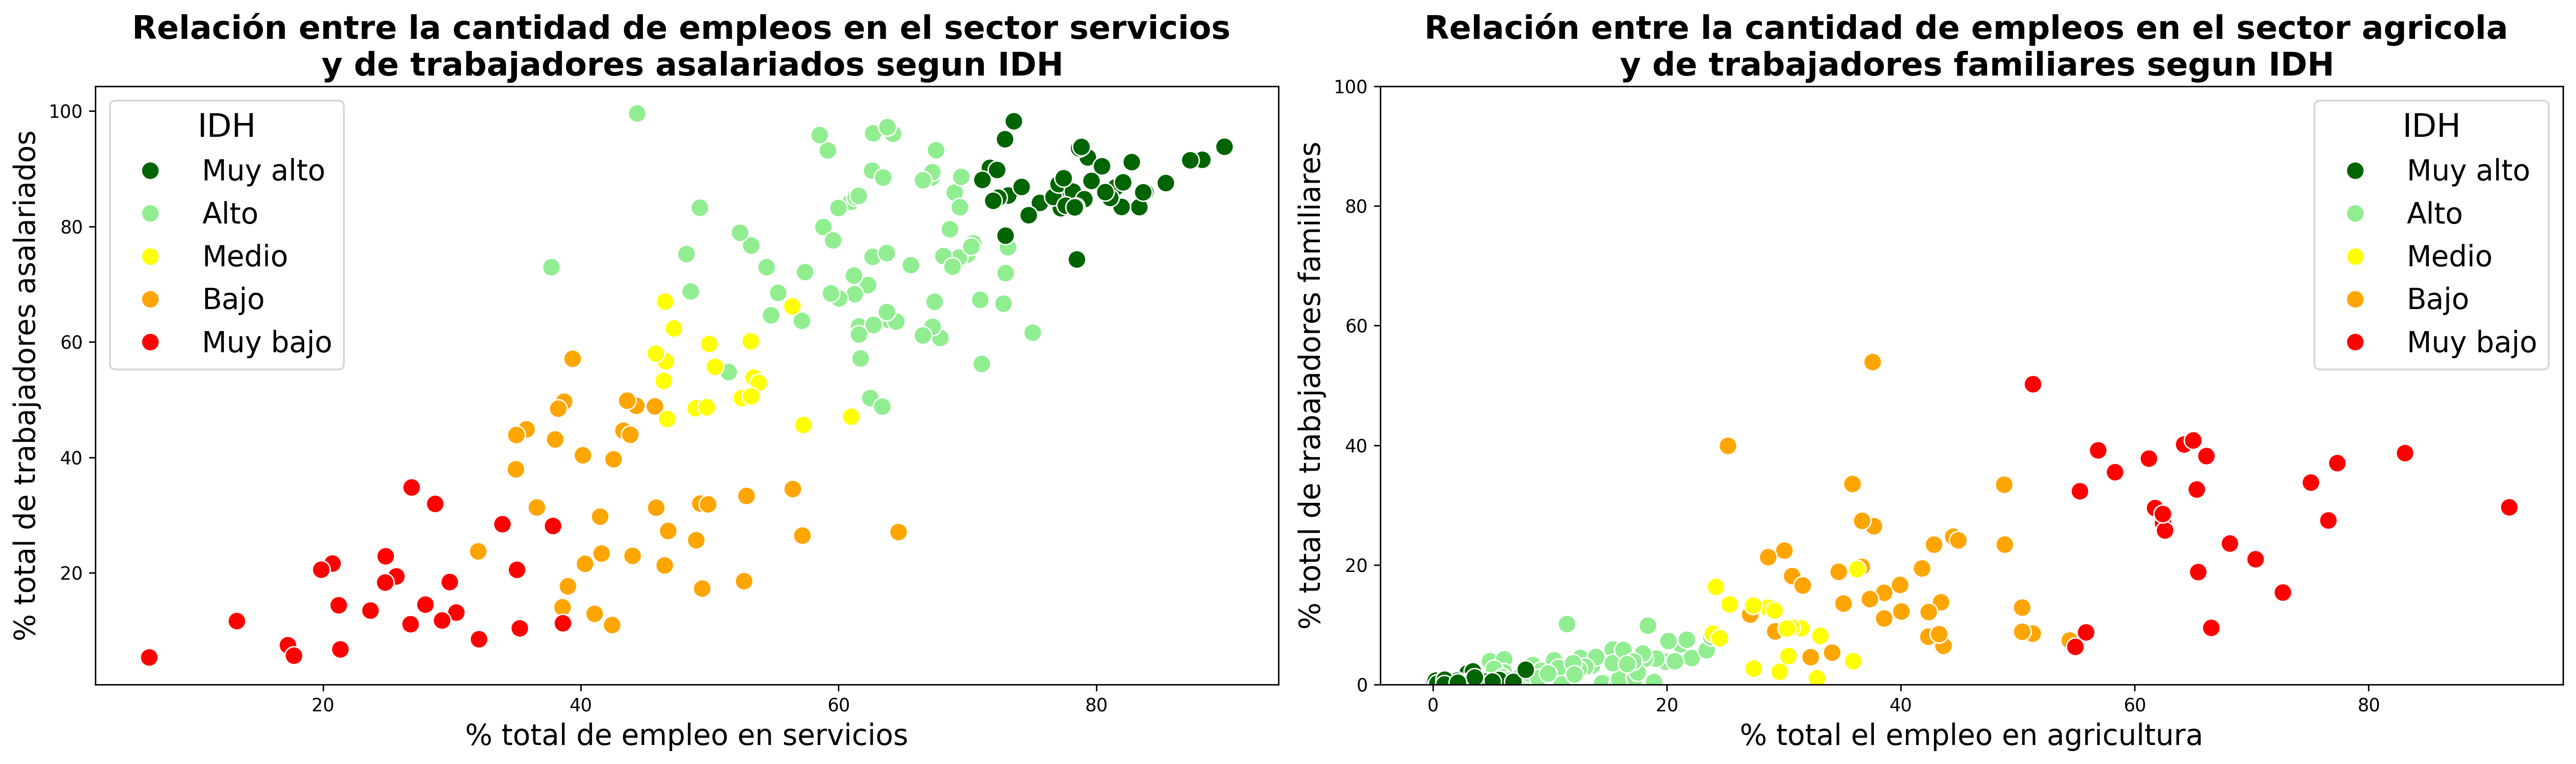

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6), dpi=300)  # Tamaño del gráfico

# Crear un diccionario para mapear los valores de clusters a sus nuevas etiquetas
cluster_labels = {
    "C3": "Muy alto",
    "C2": "Alto",
    "C4": "Medio",
    "C1": "Bajo",
    "C5": "Muy bajo"
}

# Definir los colores para cada cluster
palette = {'C3':'darkgreen' , 'C2': 'lightgreen', 'C4': 'yellow', 'C1': 'orange', 'C5': 'red'}

# Gráfico 1
sns.scatterplot(
    data=df,
    x="prop_serv",
    y="prop_asal",
    hue='clust_5',  # Variable de agrupamiento
    palette=palette,
    s=100,
    ax=ax[0]
)
ax[0].set_title("Relación entre la cantidad de empleos en el sector servicios \n y de trabajadores asalariados segun IDH", fontsize=18,fontweight='bold')
ax[0].set_xlabel("% total de empleo en servicios", fontsize=16)
ax[0].set_ylabel("% total de trabajadores asalariados", fontsize=16)



# Reordenar y personalizar la leyenda del primer gráfico
handles, labels = ax[0].get_legend_handles_labels()
ordered_cluster_ids = ["C3", "C2", "C4", "C1", "C5"]  # Orden de los clusters originales
ordered_handles = [handles[labels.index(cluster)] for cluster in ordered_cluster_ids]
ordered_labels = [cluster_labels[cluster] for cluster in ordered_cluster_ids]
ax[0].legend(ordered_handles, ordered_labels, title="IDH", fontsize=16, title_fontsize=18, loc="upper left")

# Gráfico 2
sns.scatterplot(
    data=df,
    x="prop_agro",
    y="prop_familiar",
    hue='clust_5',  # Variable de agrupamiento
    palette=palette,
    s=100,
    ax=ax[1]
)
ax[1].set_title("Relación entre la cantidad de empleos en el sector agricola \n y de trabajadores familiares segun IDH", fontsize=18,fontweight='bold')
ax[1].set_xlabel("% total el empleo en agricultura", fontsize=16)
ax[1].set_ylabel("% total de trabajadores familiares", fontsize=16)
ax[1].set_ylim(0, 100)

# Reordenar y personalizar la leyenda del segundo gráfico
handles, labels = ax[1].get_legend_handles_labels()
ordered_handles = [handles[labels.index(cluster)] for cluster in ordered_cluster_ids]
ax[1].legend(ordered_handles, ordered_labels, title="IDH", fontsize=16, title_fontsize=18, loc="upper right")

plt.tight_layout()
plt.show()


###GRACIAS TOTALES